In [1]:
import pandas as pd
from datetime import datetime

In [2]:
url = f"https://storage.googleapis.com/covid19-open-data/v3/location/US.csv"
usaData = pd.read_csv(url)
url2 = f"https://storage.googleapis.com/covid19-open-data/v3/location/US_TX.csv"
texasData = pd.read_csv(url2)
usaData.interpolate(inplace=True)
texasData.interpolate(inplace=True)

In [4]:
#variables = list(usaData.columns)
#variables

In [18]:
#usaData.date

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
DeadDf = usaData[['date', 'cumulative_confirmed', 'cumulative_persons_vaccinated', 'cumulative_deceased']]
cleanDeadDf = DeadDf.copy() 
cleanDeadDf = cleanDeadDf.interpolate()
cleanDeadDf.fillna(0 , inplace=True)

In [7]:
df = px.data.stocks()
fig = px.line(cleanDeadDf, x='date', y="cumulative_confirmed")
fig.show()


In [8]:
import yfinance as yf
import datetime
import time
import requests

In [9]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,9,17)

In [10]:
djiaFrame = yf.download("dji",start=start, end=end, progress=False)
djiaFrame.reset_index(inplace=True)

In [11]:
sp500Frame = yf.download("^GSPC",start=start, end=end, progress=False)
sp500Frame.reset_index(inplace=True)

In [12]:
goldFrame = yf.download("GC=F",start=start, end=end, progress=False)
goldFrame.reset_index(inplace=True)

In [13]:
from pandas.plotting import register_matplotlib_converters
from matplotlib.ticker import FuncFormatter

In [14]:
xD = djiaFrame["Date"]
yD = djiaFrame["Close"]
xS = sp500Frame["Date"]
yS = sp500Frame["Close"]
xC = usaData["date"]
yC = usaData["cumulative_deceased"]

register_matplotlib_converters()
xC = pd.to_datetime(xC)

In [15]:
def millionsFormatter(x, pos):
    return f'{x / 1e6:.1f}M'

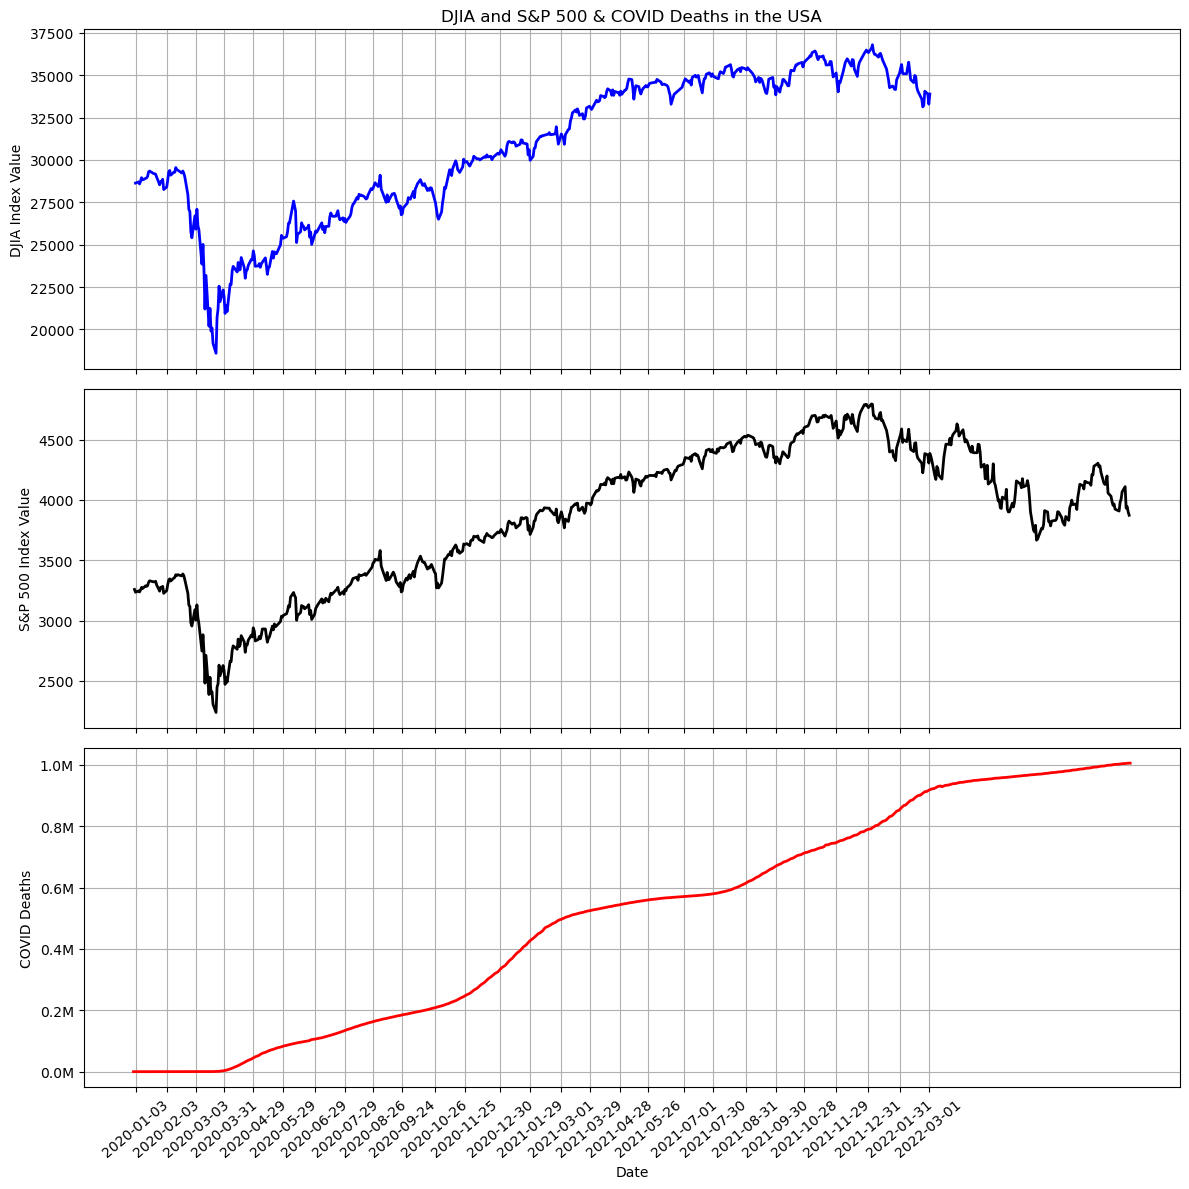

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID Deaths in the USA", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("COVID Deaths", fontsize=10)
ax3.yaxis.set_major_formatter(millionsFormatter)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/usaMarketAndDeath.png")
plt.show()

In [17]:
yC = usaData["cumulative_persons_vaccinated"]

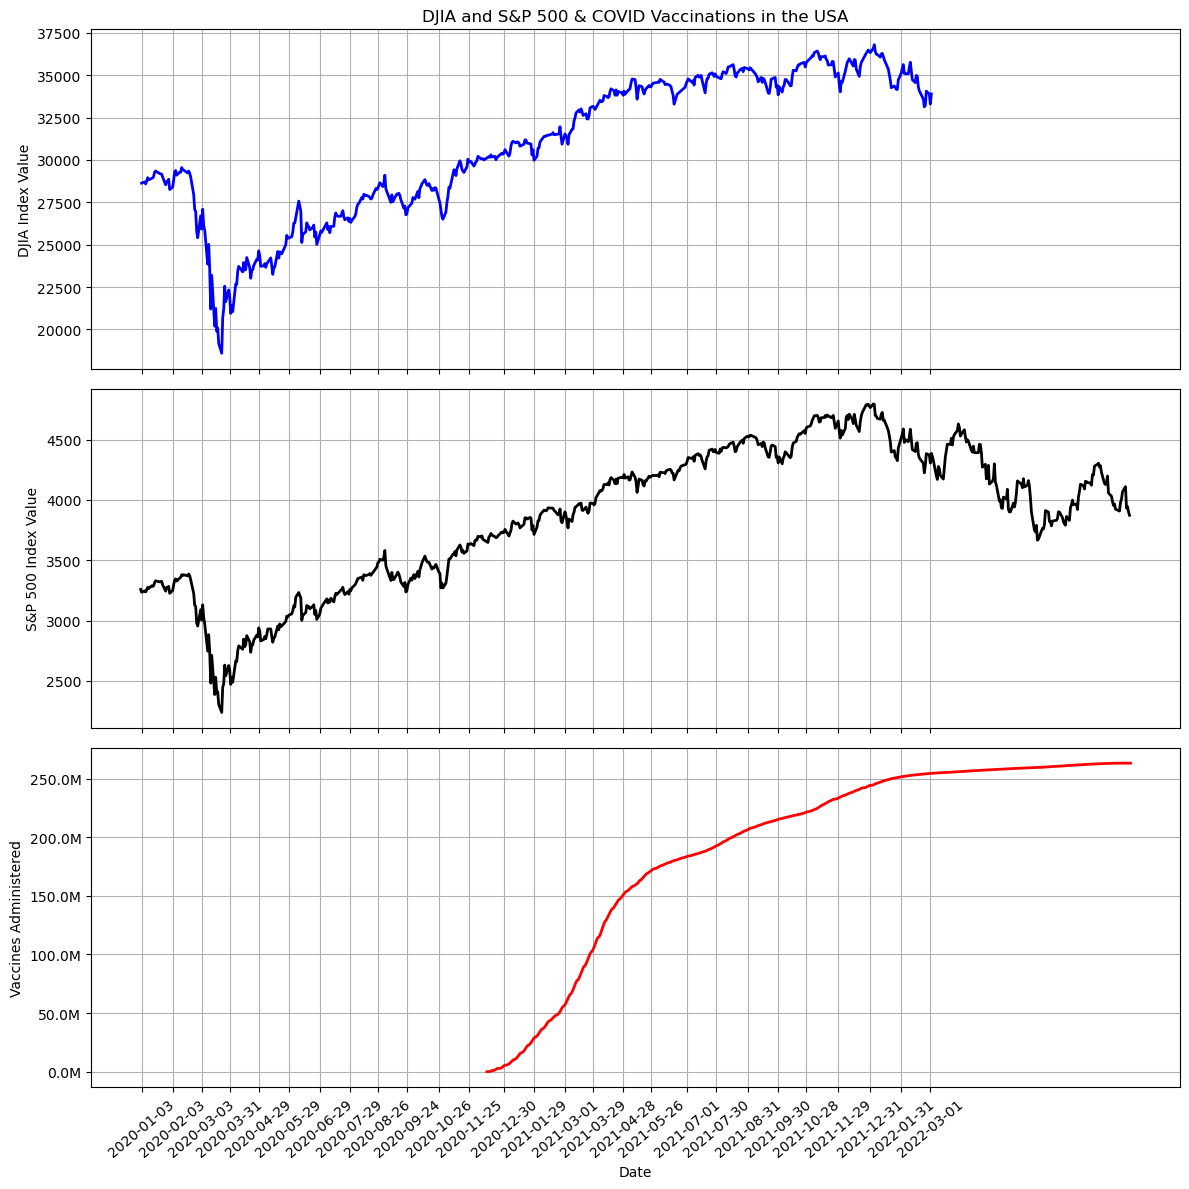

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID Vaccinations in the USA", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("Vaccines Administered", fontsize=10)
ax3.yaxis.set_major_formatter(millionsFormatter)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/usaMarketAndVac.png")
plt.show()

In [19]:
xC = texasData["date"]
yC = texasData["cumulative_deceased"]

register_matplotlib_converters()
xC = pd.to_datetime(xC)

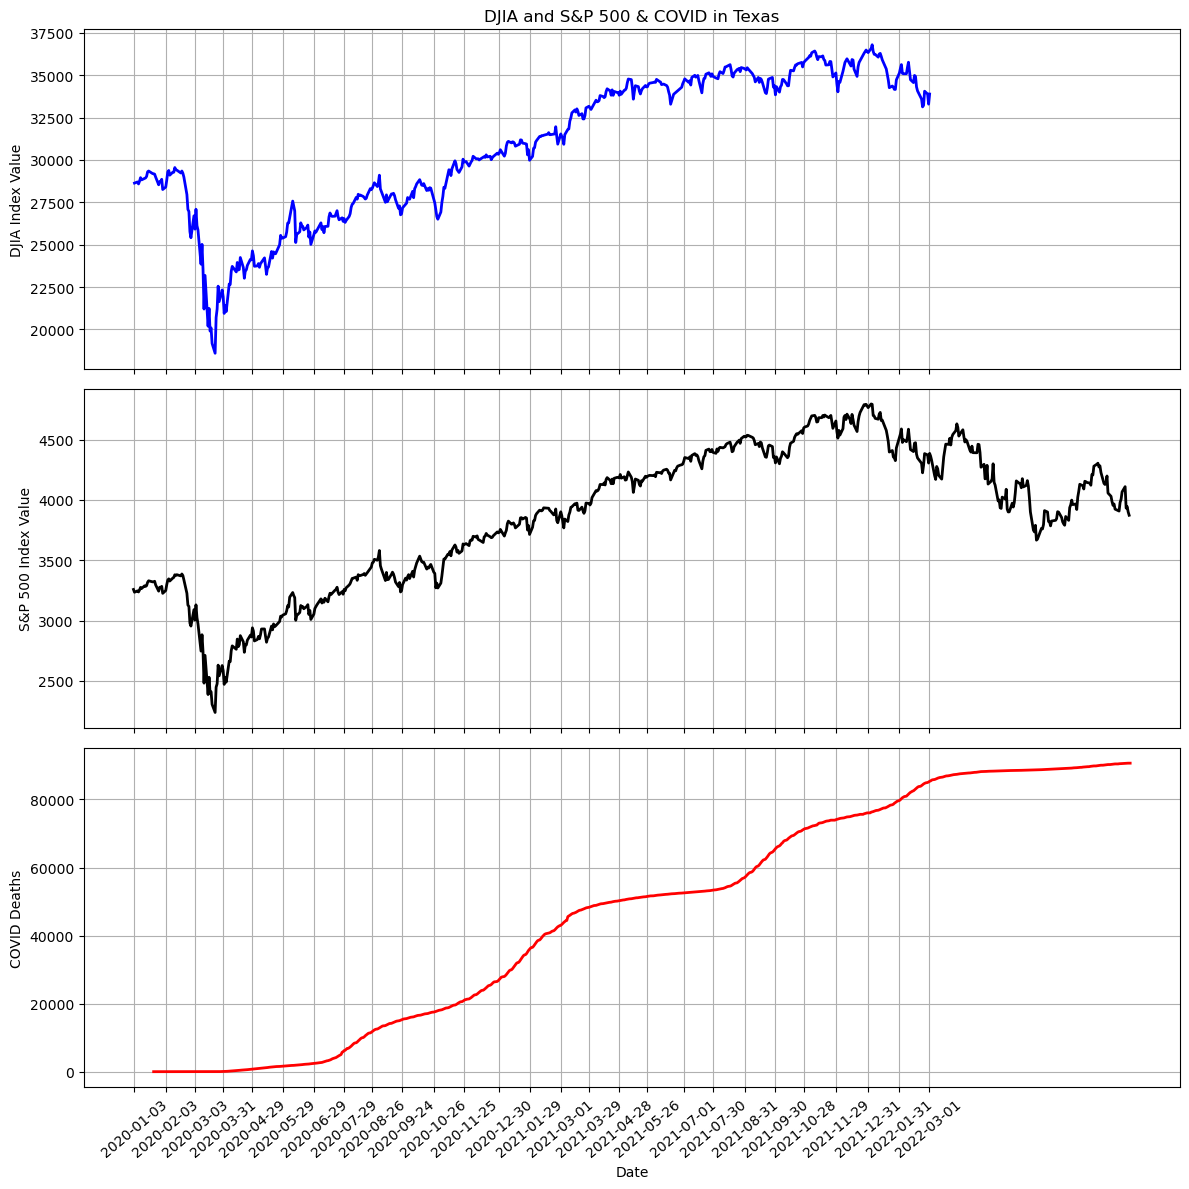

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID in Texas", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("COVID Deaths", fontsize=10)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasMarketAndDeaths.png")
plt.show()

In [21]:
yC = texasData["cumulative_persons_vaccinated"]

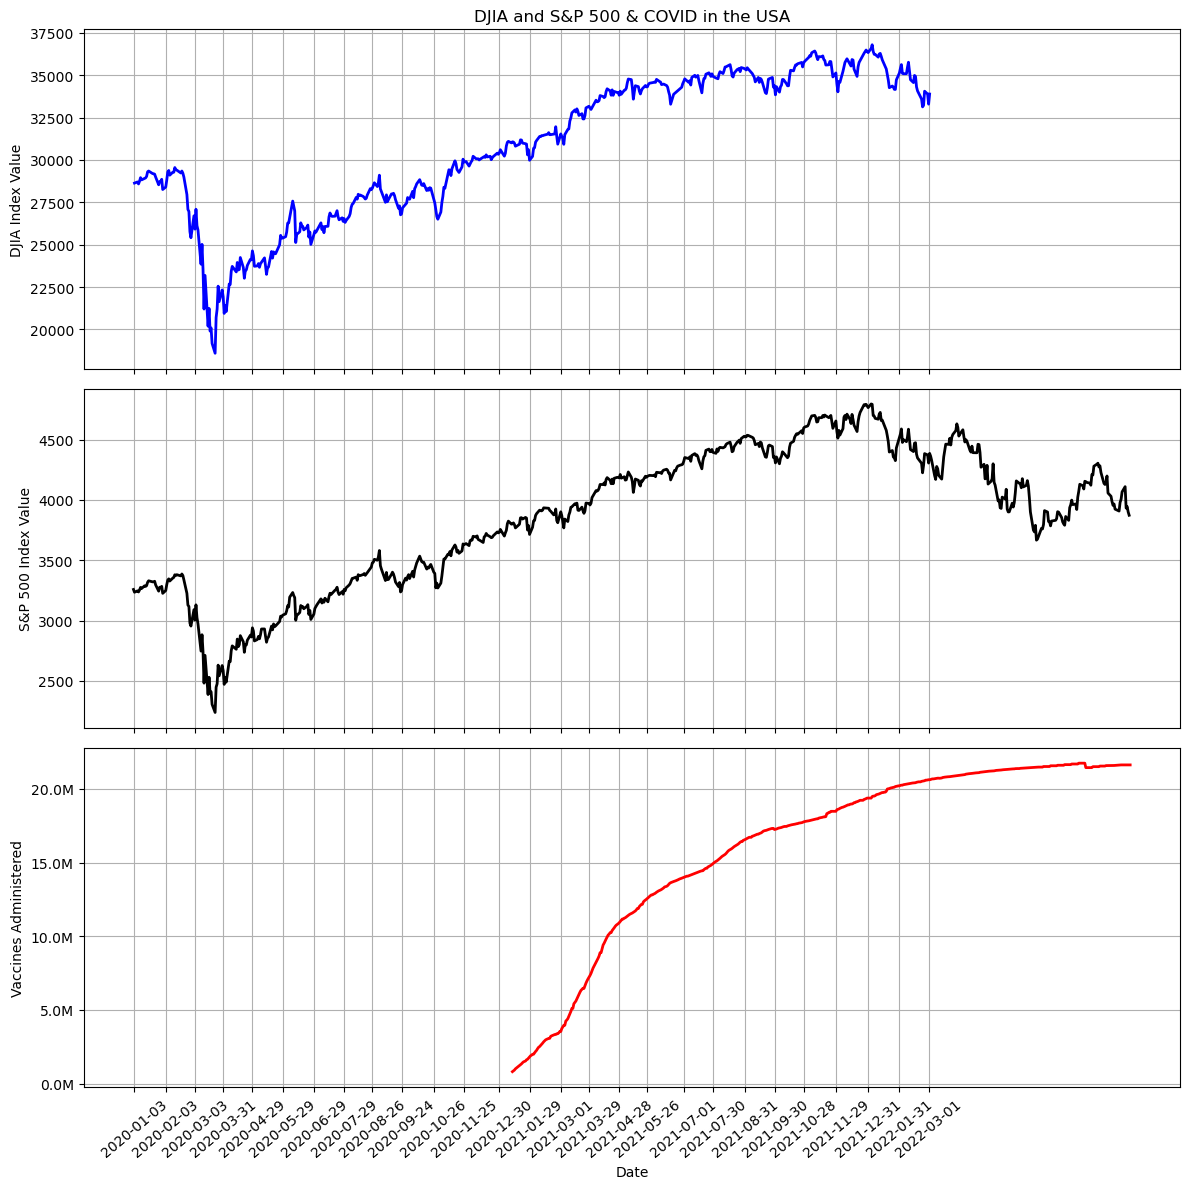

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax1.plot(xD, yD, color="b", linewidth=2)
ax1.set_ylabel("DJIA Index Value", fontsize=10)
ax1.set_title("DJIA and S&P 500 & COVID in the USA", fontsize=12)
ax1.grid()

ax2.plot(xS, yS, color="k", linewidth=2)
ax2.set_ylabel("S&P 500 Index Value", fontsize=10)
ax2.grid()

ax3.plot(xC, yC, color="r", linewidth=2)
ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("Vaccines Administered", fontsize=10)
ax3.yaxis.set_major_formatter(millionsFormatter)
ax3.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasMarketAndVac.png")
plt.show()

In [23]:
yC = texasData["cumulative_persons_vaccinated"]
xG = goldFrame["Date"]
yG = goldFrame["Close"]

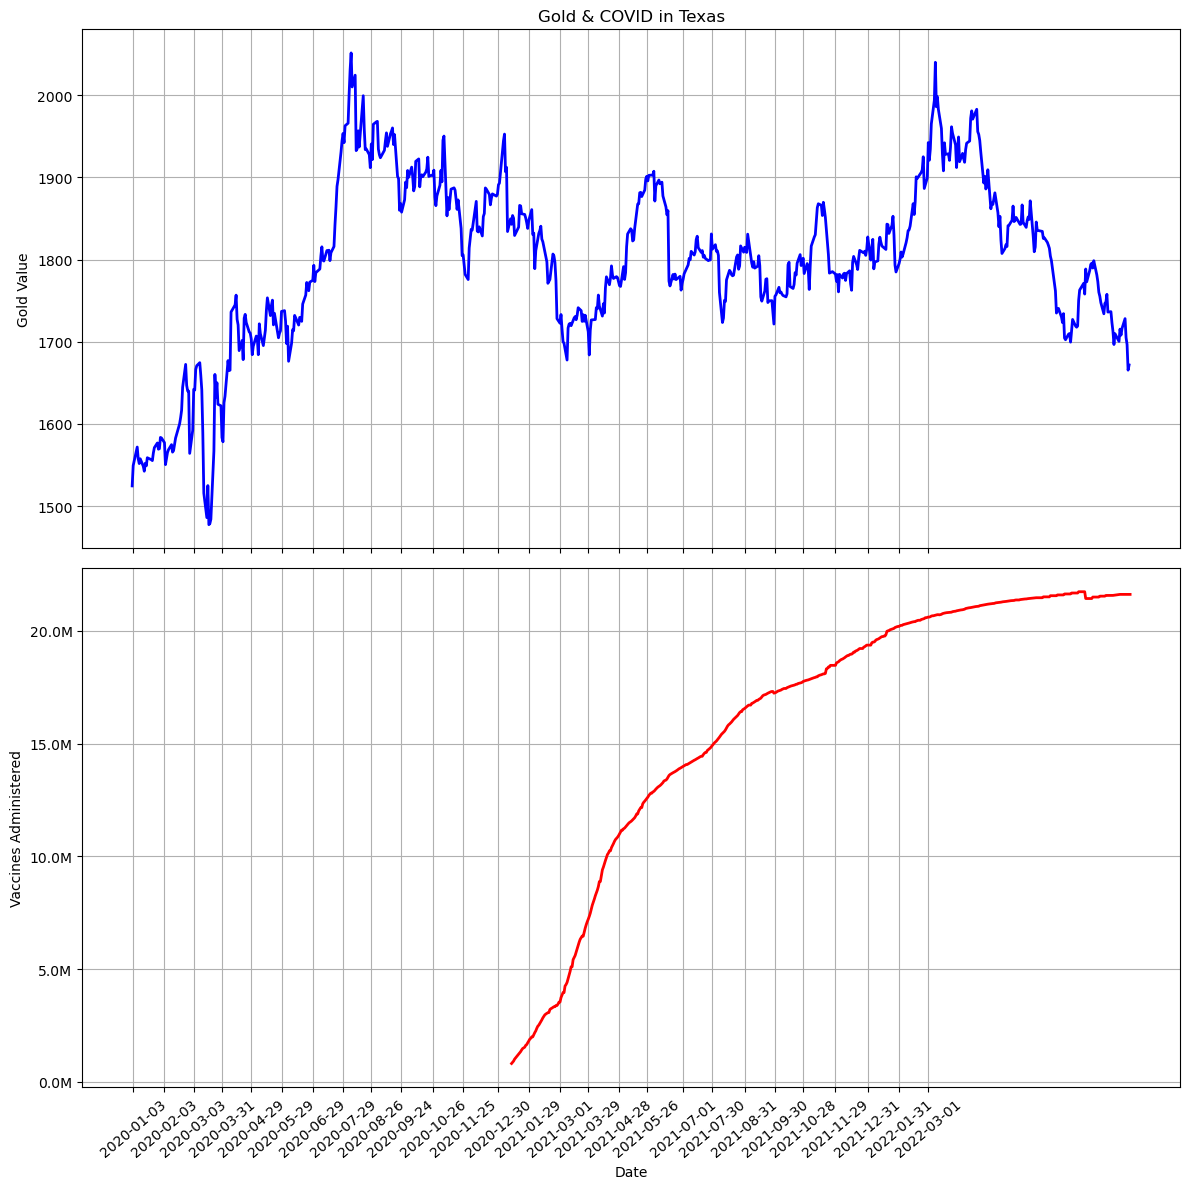

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xG, yG, color="b", linewidth=2)
ax1.set_ylabel("Gold Value", fontsize=10)
ax1.set_title("Gold & COVID in Texas", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("Vaccines Administered", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasGoldAndVac.png")
plt.show()

In [25]:
yC = usaData["cumulative_deceased"]
xG = goldFrame["Date"]
yG = goldFrame["Close"]

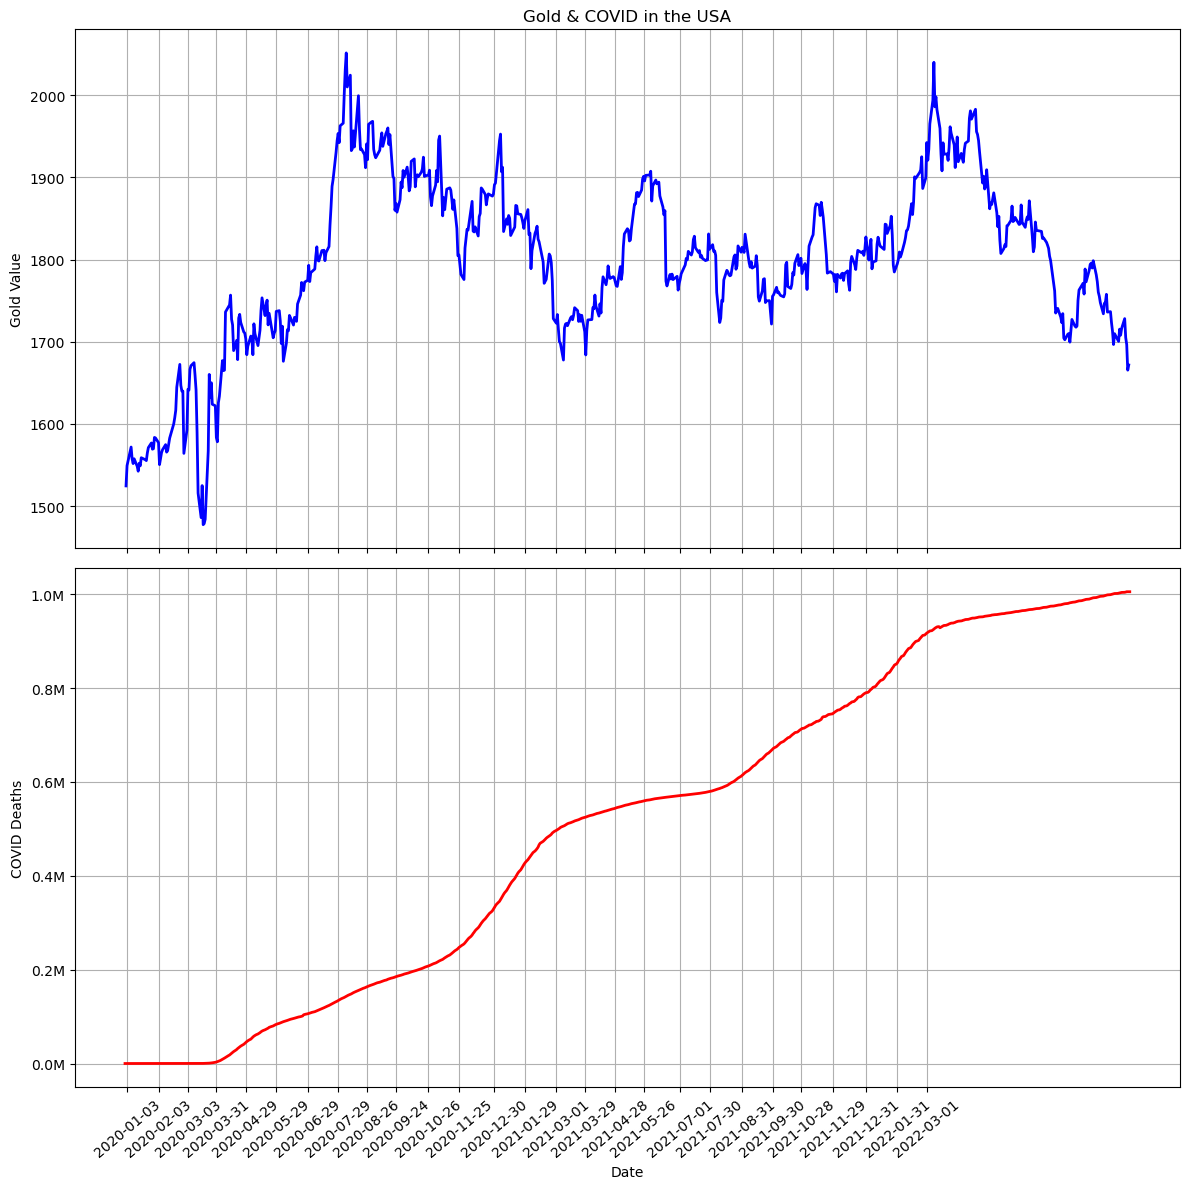

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xG, yG, color="b", linewidth=2)
ax1.set_ylabel("Gold Value", fontsize=10)
ax1.set_title("Gold & COVID in the USA", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Deaths", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/usaGoldAndVac.png")
plt.show()

In [27]:
texasUDataLoad = pd.read_csv("data/txu.csv")
texasUData = texasUDataLoad[texasUDataLoad['Date'].str.endswith(('20', '21', '22'))]
yC = texasData["cumulative_persons_vaccinated"]
xT = texasUData["Date"]
yT = texasUData["Unemployment Rate"]
xT = pd.to_datetime(xT)

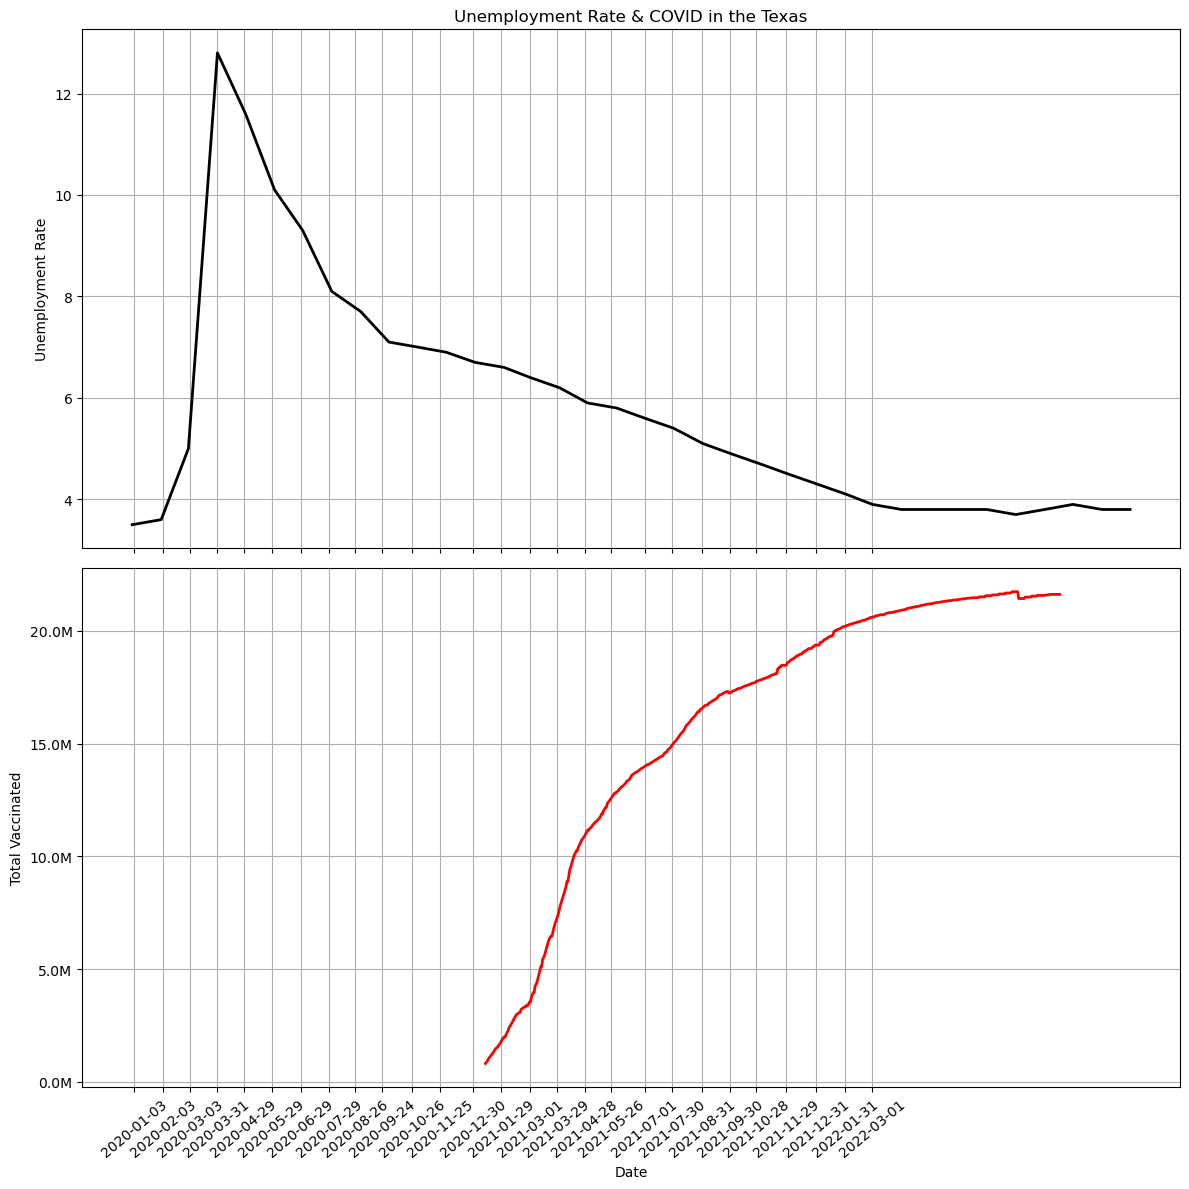

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xT, yT, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID in the Texas", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("Total Vaccinated", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasUnempVac.png")
plt.show()

In [29]:
yC = texasData["cumulative_deceased"]

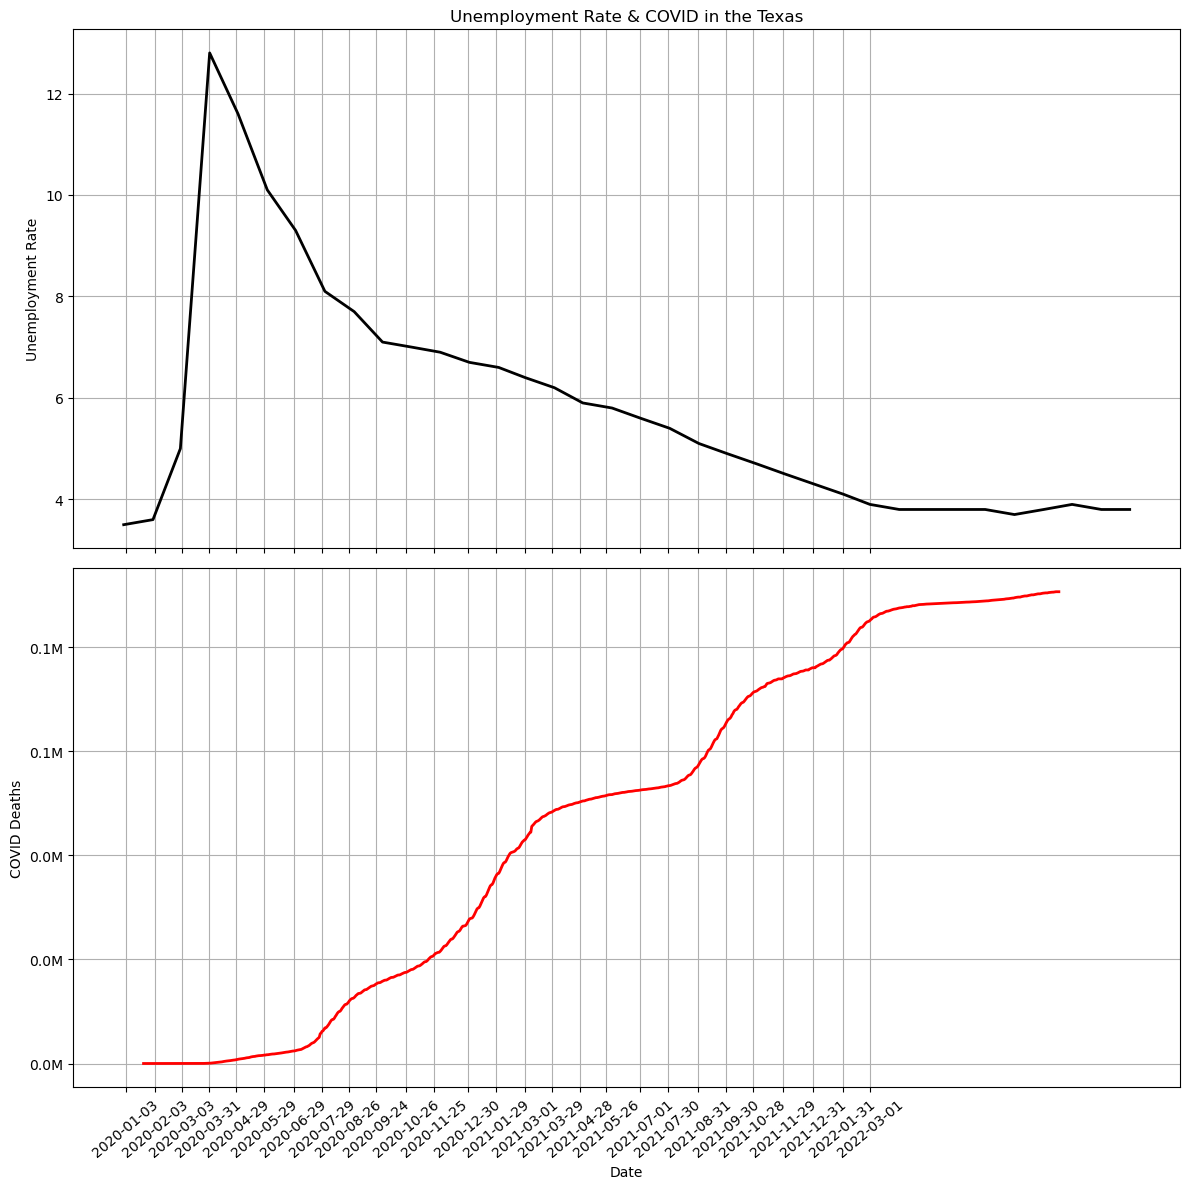

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax1.plot(xT, yT, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID in the Texas", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Deaths", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(xD.values[::20], rotation=40)
plt.tight_layout()
plt.savefig("images/texasUnempDeaths.png")
plt.show()

In [31]:
usaUDataLoad = pd.read_csv("data/usaunemployment.csv")
#usaUDataLoad

In [12]:
#usaUDataLoad.columns

Index(['Title', 'Unemployment rate (aged 16 and over, seasonally adjusted): %'], dtype='object')

In [32]:
yUu = usaUDataLoad["Unemployment rate (aged 16 and over, seasonally adjusted): %"][848:875]
xUu = usaUDataLoad["Title"][848:875]
yC = usaData["cumulative_deceased"]

In [33]:
xUu = pd.to_datetime(xUu)

In [34]:
min_length = min(len(xUu), len(xD))
xUu = xUu[:min_length]
xD = xD[:min_length]

min_length = min(len(yUu), len(yD))
yUu = yUu[:min_length]
yD = yD[:min_length]


In [35]:
xUu = pd.to_datetime(xUu)
#xUu

848   2020-01-01
849   2020-02-01
850   2020-03-01
851   2020-04-01
852   2020-05-01
853   2020-06-01
854   2020-07-01
855   2020-08-01
856   2020-09-01
857   2020-10-01
858   2020-11-01
859   2020-12-01
860   2021-01-01
861   2021-02-01
862   2021-03-01
863   2021-04-01
864   2021-05-01
865   2021-06-01
866   2021-07-01
867   2021-08-01
868   2021-09-01
869   2021-10-01
870   2021-11-01
871   2021-12-01
872   2022-01-01
873   2022-02-01
874   2022-03-01
Name: Title, dtype: datetime64[ns]

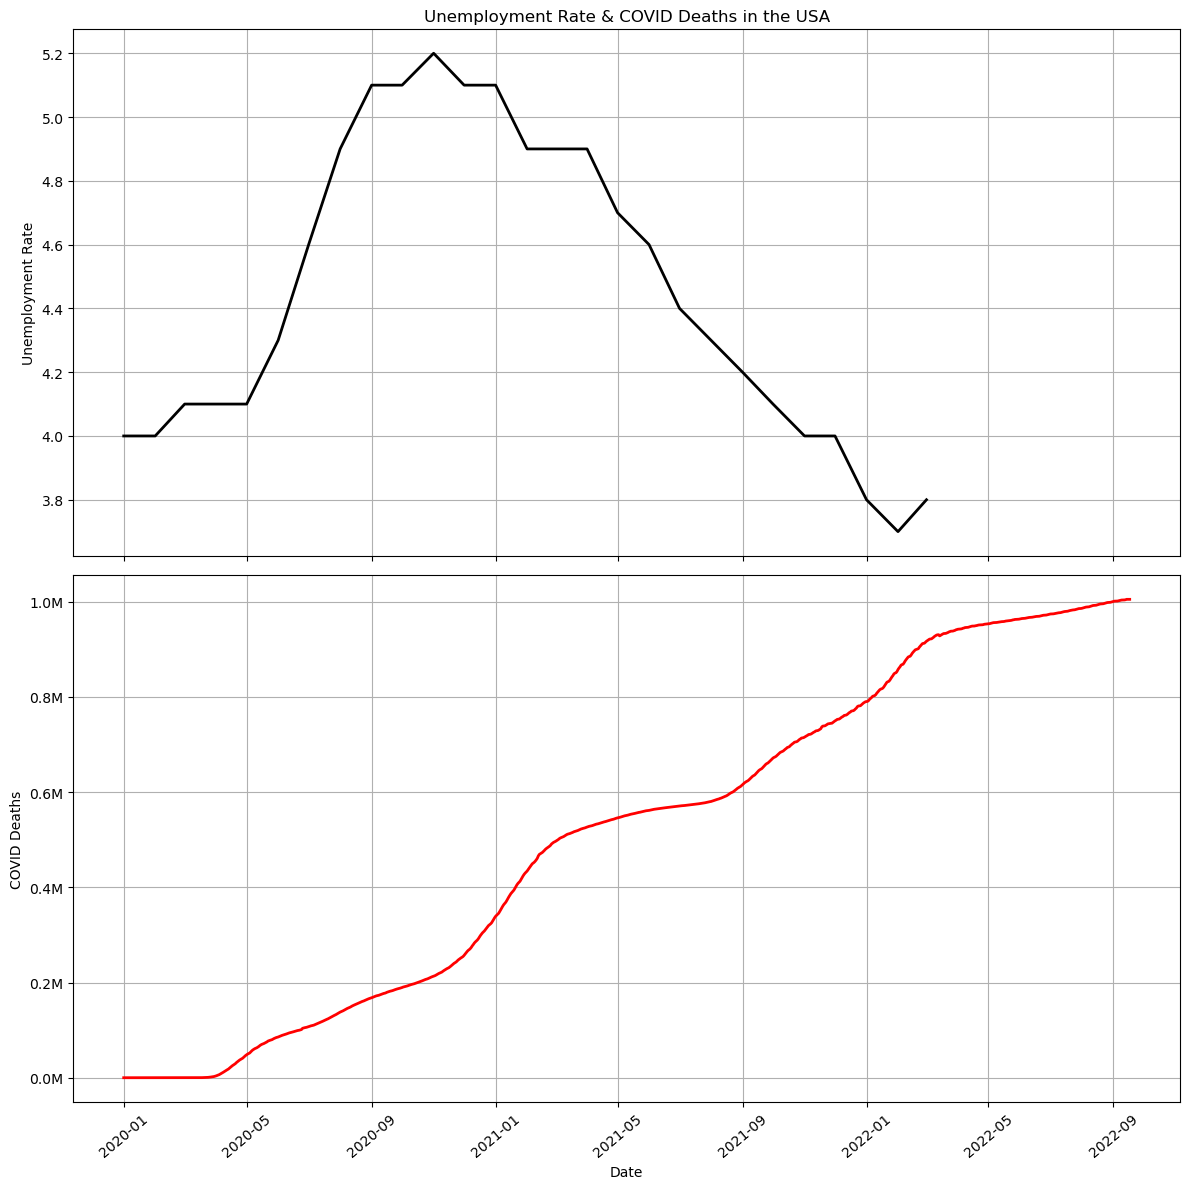

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 12), sharex=True)
ax1.plot(xUu, yUu, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID Deaths in the USA", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Deaths", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)
ax2.grid()

plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig("images/usaUnemploymentAndDeath.png")
plt.show()

In [37]:
yC = usaData["cumulative_persons_vaccinated"]

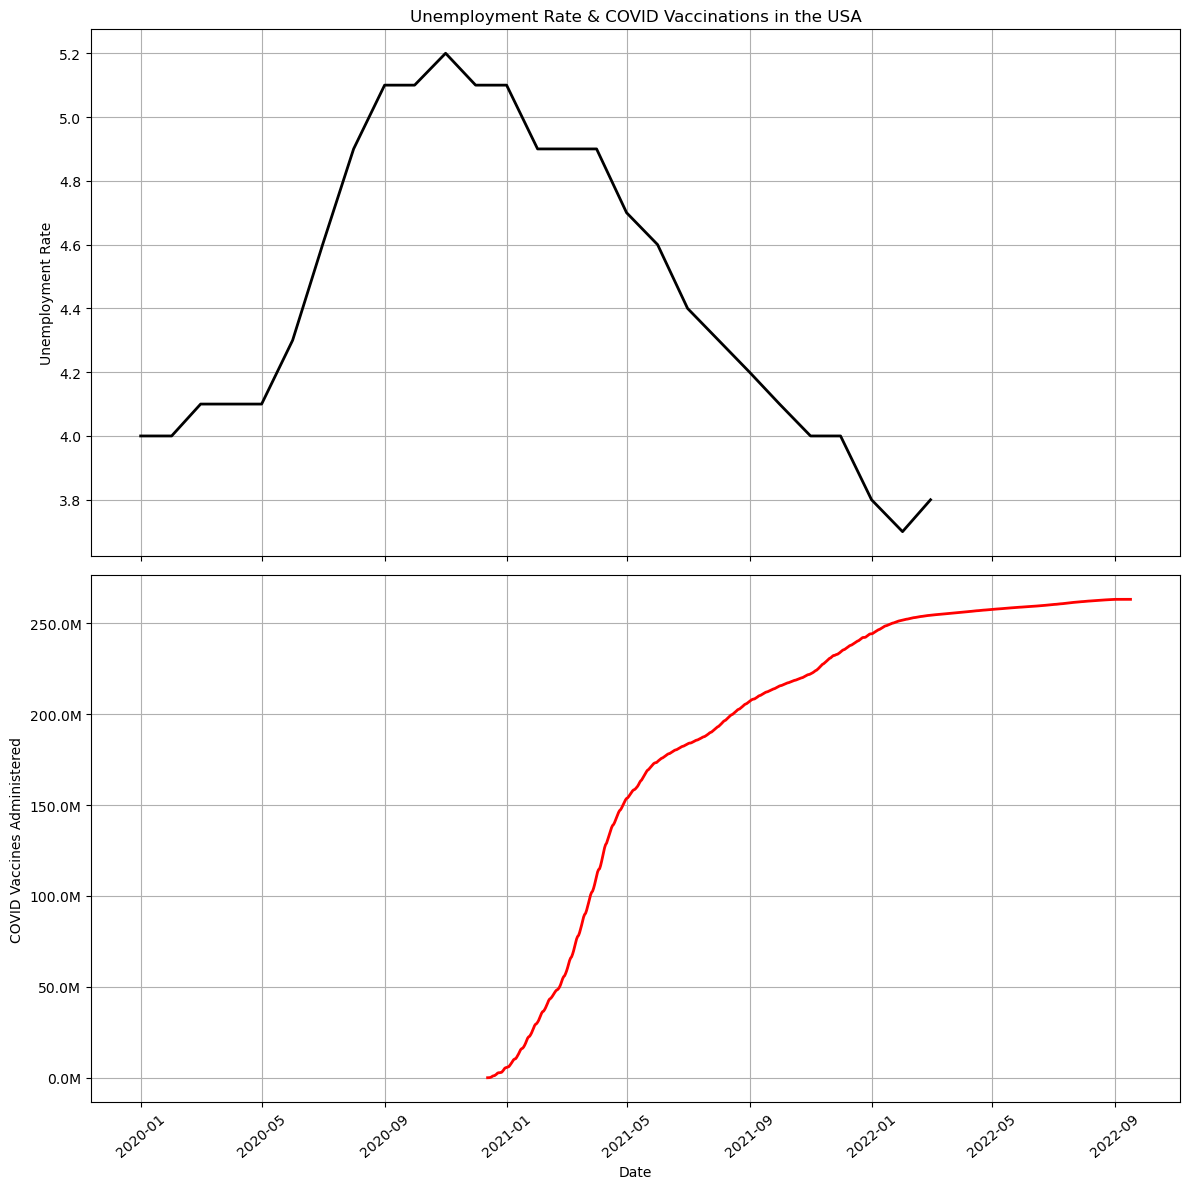

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 12), sharex=True)
ax1.plot(xUu, yUu, color="k", linewidth=2)
ax1.set_ylabel("Unemployment Rate", fontsize=10)
ax1.set_title("Unemployment Rate & COVID Vaccinations in the USA", fontsize=12)
ax1.grid()

ax2.plot(xC, yC, color="r", linewidth=2)
ax2.set_xlabel("Date", fontsize=10)
ax2.set_ylabel("COVID Vaccines Administered", fontsize=10)
ax2.yaxis.set_major_formatter(millionsFormatter)

ax2.grid()

plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig("images/usaUnemploymentAndVacc.png")
plt.show()